In [1]:
import Pkg
Pkg.add("QuantumOptics")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("PyCall")


   Resolving package versions...
     Project No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Project.toml`
    Manifest No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Project.toml`
    Manifest No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Project.toml`
    Manifest No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Project.toml`
    Manifest No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Manifest.toml`


In [1]:
using QuantumOptics
using PyPlot

In [2]:
# Parameters
N_cutoff = 10

ωc = 0.1
ωa = 0.1
Ω = 1.0

1.0

In [3]:
# Bases
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

[Fock(cutoff=10) ⊗ Spin(1/2)]

In [4]:
# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)
H = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

Operator(dim=22x22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]
⎡⠑⢄⠀⠀⠀⠀⠑⢄⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠑⢄⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠑⎥
⎢⠑⢄⠀⠀⠀⠀⠑⢄⠀⠀⠀⎥
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠑⢄⠀⎥
⎣⠀⠀⠀⠀⠑⠀⠀⠀⠀⠀⠑⎦

In [5]:
# Initial state
α = 1.
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)

# Integration time
T = [0:0.1:20;]

# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H)

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0], Ket{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, Vector{ComplexF64}}[Ket(dim=22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
  0.6065306597126334 + 0.0im
  0.6065306597126334 + 0.0im
  0.4288819424803534 + 0.0im
 0.24761510494160163 + 0.0im
 0.12380755247080082 + 0.0im
 0.05536842069051653 + 0.0im
 0.02260406309258736 + 0.0im
  0.0085435327946571 + 0.0im
 0.00302059498719585 + 0.0im
 0.00100686499573195 + 0.0im
 0.00031839866828087 + 0.0im, Ket(dim=22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]
 -0.00030275887903015 - 0.0605512711951

In [6]:
exp_n = real(expect(n ⊗ one(b_spin), Ψt))
exp_sz = real(expect(one(b_fock) ⊗ sz, Ψt))

201-element Vector{Float64}:
 -0.9999999899522336
 -0.9801328818619587
 -0.9221051267321438
 -0.8304821568292733
 -0.712373786172327
 -0.5767469874214639
 -0.43357855209108787
 -0.29294362388559037
 -0.16413999837610063
 -0.054939304331538305
  0.028963524791731445
  0.08425852784028105
  0.11007384027762891
  ⋮
 -0.5085473153549644
 -0.4947103578601834
 -0.4864085314342965
 -0.48340944097015687
 -0.48433034973684275
 -0.4868032834392031
 -0.48776256842466464
 -0.4838277793799989
 -0.47174396346729214
 -0.44883337938311474
 -0.4134097359819019
 -0.36510762769122324

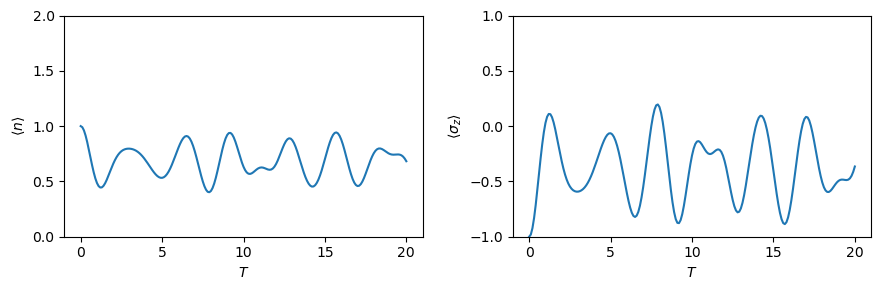

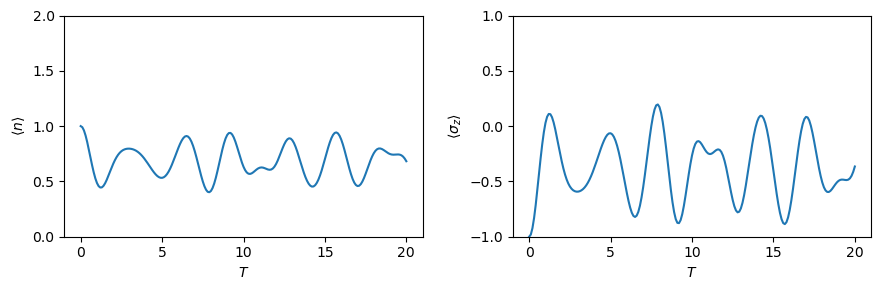

In [7]:
figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n);
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

tight_layout()
display(gcf())